In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas_datareader.data as web

In [2]:
apple = web.DataReader('aapl'
                       , 'yahoo'
                       , start = '12/12/1980'
                      )
apple.shape

(10091, 6)

In [3]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615


In [4]:
apple['Close_Shift1_DOwn'] = apple.Close.shift(1, fill_value = 0.0)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn
Date,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513


In [5]:
# Function to find the max daily change in the direction of overall daily change 
def hl(h, l, o, c):
    if o - c > 0:
        return l-h
    else:
        return h-l

In [6]:
# Max daily change in the same direction fo daily change
apple['Max Daily Change'] = apple.apply(lambda x: hl(x[0], x[1], x[2], x[3]), axis=1)
apple.sample(10)

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change
Date,,,,,,,,
1998-12-22,0.340402,0.321429,0.324777,0.339286,1.150800e+09,0.292685,0.313058,0.018973
2006-03-31,2.271786,2.222857,2.258929,2.240000,8.153572e+08,1.932338,2.241071,-0.048928
2008-09-26,4.635714,4.392857,4.461071,4.580000,1.126451e+09,3.950940,4.711786,0.242857
1994-10-14,0.375000,0.364955,0.370536,0.367188,1.760528e+08,0.312244,0.367188,-0.010045
2009-04-14,4.291786,4.187500,4.270357,4.225357,4.546220e+08,3.645009,4.293571,-0.104286
1996-11-12,0.234375,0.224330,0.233259,0.225446,1.429568e+08,0.194482,0.232143,-0.010045
2017-06-01,38.332500,38.055000,38.292500,38.294998,6.561640e+07,36.576199,38.189999,0.277500
2004-02-19,0.422143,0.400179,0.416607,0.401250,3.230808e+08,0.346139,0.415357,-0.021964
1998-08-27,0.350446,0.318080,0.350446,0.334821,1.114243e+09,0.288834,0.360491,-0.032366


In [7]:
# negative means the next day opened lower than the pervious day
apple['Interday Change'] = apple.apply(lambda x: x[2] - x[6], axis = 1)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change
Date,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348


In [8]:
# Positive 'Close Adjusted Close' means overvalued price at close of day
apple['Close Adjusted Close'] = apple.apply(lambda x: x[3] - x[5], axis = 1)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247


In [9]:
apple[(apple['Max Daily Change'] > 0) & (apple['Interday Change'] < 0)]

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1986-03-17,0.116071,0.113281,0.116071,0.116071,118720000.0,0.091418,0.116629,0.002790,-0.000558,0.024654
1986-08-01,0.141741,0.138951,0.138951,0.140067,150080000.0,0.110316,0.139509,0.002790,-0.000558,0.029751
1986-08-12,0.153460,0.148996,0.148996,0.152902,244160000.0,0.120425,0.149554,0.004464,-0.000558,0.032477
1986-08-19,0.158482,0.154576,0.156808,0.157924,137782400.0,0.124381,0.157924,0.003906,-0.001116,0.033544
1986-08-20,0.162946,0.157366,0.157366,0.161830,171315200.0,0.127457,0.157924,0.005580,-0.000558,0.034373
...,...,...,...,...,...,...,...,...,...,...
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003,119.260002,2.839996,-0.340004,0.000000
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999,118.029999,2.250000,-0.440002,0.000000
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,123.080002,122.720001,2.480003,-0.700005,0.000000


In [10]:
apple[apple['Open'] == apple['Close']]

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247
1980-12-19,0.126674,0.126116,0.126116,0.126116,48630400.0,0.099329,0.118862,0.000558,0.007254,0.026787
1980-12-22,0.132812,0.132254,0.132254,0.132254,37363200.0,0.104163,0.126116,0.000558,0.006138,0.028091
...,...,...,...,...,...,...,...,...,...,...
2014-07-01,23.517500,23.282499,23.379999,23.379999,152892000.0,21.101110,23.232500,0.235001,0.147499,2.278889
2015-07-28,30.977501,30.637501,30.844999,30.844999,134472400.0,28.326986,30.692499,0.340000,0.152500,2.518013
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889,43.750000,0.420002,-0.162498,1.642612


In [11]:
apple['Open Close % Change'] = (apple['Close'] - apple['Open']) / apple['Open'] * 100
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change
Date,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000


In [12]:
apple['Open Close % Change'].describe()

count    10091.000000
mean        -0.010760
std          2.343740
min        -24.352329
25%         -1.162786
50%          0.000000
75%          1.087892
max         19.266055
Name: Open Close % Change, dtype: float64

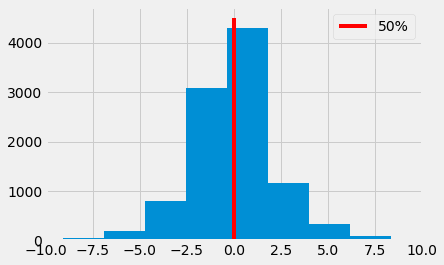

In [13]:
apple['Open Close % Change'].hist(bins=20)
plt.vlines(0, 0, 4500, colors='r', label = '50%')
plt.xlim(-10, 10)
plt.legend();

In [14]:
apple['Open Close % Change'].quantile([0.84])

0.84    1.83602
Name: Open Close % Change, dtype: float64

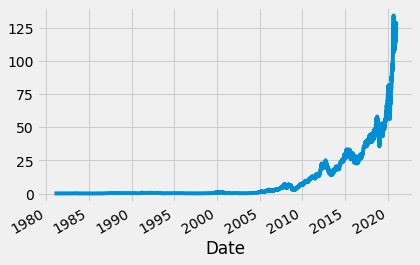

In [15]:
apple['Close'].plot();

In [16]:
def decision(p):
    if p > 1.5:
        return 1
    elif p < -0.75:
        return -1
    else:
        return 0

In [17]:
apple['Buy Hold Sell'] = apple.apply(lambda x: decision(x[10]), axis = 1)

In [18]:
apple.sample(10)

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell
Date,,,,,,,,,,,,
2012-12-21,18.559643,18.222857,18.302500,18.547501,5.962684e+08,16.142099,18.633215,0.336786,-0.330715,2.405401,1.338620,0
1985-08-20,0.068080,0.068080,0.068080,0.068080,6.695360e+07,0.053620,0.066964,0.000000,0.001116,0.014460,0.000000,0
2017-06-20,36.717499,36.235001,36.717499,36.252499,9.960040e+07,34.625374,36.584999,-0.482498,0.132500,1.627125,-1.266427,-1
2009-11-06,6.971071,6.871428,6.875357,6.940714,2.950976e+08,5.987414,6.929643,0.099643,-0.054286,0.953300,0.950601,0
2002-03-22,0.438571,0.426250,0.432500,0.430179,2.021936e+08,0.371094,0.433393,-0.012321,-0.000893,0.059085,-0.536745,0
2018-01-19,44.895000,44.352501,44.652500,44.615002,1.297004e+08,42.933674,44.814999,-0.542500,-0.162498,1.681328,-0.083978,0
2004-11-09,0.974107,0.953214,0.968393,0.965179,4.757648e+08,0.832612,0.971071,-0.020893,-0.002679,0.132566,-0.331921,0
2005-07-28,1.571429,1.546429,1.566071,1.564286,2.513112e+08,1.349432,1.571071,-0.025000,-0.005000,0.214853,-0.114020,0
1999-01-06,0.393973,0.366071,0.393973,0.372768,1.348570e+09,0.321569,0.386719,-0.027902,0.007254,0.051199,-5.382431,-1


In [19]:
# Min Max Normalization of Features
vol_max = apple['Volume'].max()
vol_min = apple['Volume'].min()
apple['Volume Norm'] = (apple['Volume'] - vol_min) / (vol_max - vol_min)

daily_max = apple['Max Daily Change'].max()
daily_min = apple['Max Daily Change'].min()
apple['Max Daily Change Norm'] = (apple['Max Daily Change'] - daily_min) / (daily_max - daily_min)

inter_max = apple['Interday Change'].max()
inter_min = apple['Interday Change'].min()
apple['Interday Change Norm'] = (apple['Interday Change'] - inter_min) / (inter_max - inter_min)

adj_max = apple['Close Adjusted Close'].max()
adj_min = apple['Close Adjusted Close'].min()
apple['Close Adjusted Close Norm'] = (apple['Close Adjusted Close'] - adj_min) / (adj_max - adj_min)

apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm
Date,,,,,,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000,0,0.063023,0.461562,0.581742,0.008135
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625,0,0.023516,0.461515,0.573176,0.007711
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609,0,0.014061,0.461515,0.573034,0.007145
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000,0,0.011462,0.461562,0.573745,0.007321
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000,0,0.009711,0.461562,0.573780,0.007534


In [20]:
apple['Buy Hold Sell Shift1 Down'] = apple['Buy Hold Sell'].shift(1, fill_value=0).astype(int)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Down
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000,0,0.063023,0.461562,0.581742,0.008135,0
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625,0,0.023516,0.461515,0.573176,0.007711,0
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609,0,0.014061,0.461515,0.573034,0.007145,0
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000,0,0.011462,0.461562,0.573745,0.007321,0
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000,0,0.009711,0.461562,0.573780,0.007534,0


In [21]:
# Select features
apple.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Close_Shift1_DOwn', 'Max Daily Change', 'Interday Change',
       'Close Adjusted Close', 'Open Close % Change', 'Buy Hold Sell',
       'Volume Norm', 'Max Daily Change Norm', 'Interday Change Norm',
       'Close Adjusted Close Norm', 'Buy Hold Sell Shift1 Down'],
      dtype='object')

In [22]:
apple_ = apple[['Volume Norm'
                , 'Max Daily Change Norm'
                , 'Interday Change Norm'
                , 'Close Adjusted Close Norm'
                , 'Buy Hold Sell Shift1 Down'
               ]
              ]

In [23]:
apple_.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Down
Date,,,,,
1980-12-12,0.063023,0.461562,0.581742,0.008135,0
1980-12-15,0.023516,0.461515,0.573176,0.007711,0
1980-12-16,0.014061,0.461515,0.573034,0.007145,0
1980-12-17,0.011462,0.461562,0.573745,0.007321,0
1980-12-18,0.009711,0.461562,0.573780,0.007534,0


In [24]:
targets = list(apple_['Buy Hold Sell Shift1 Down'].value_counts().index)
targets_counts = list(apple_['Buy Hold Sell Shift1 Down'].value_counts().values)

In [25]:
targets

[0, -1, 1]

In [26]:
targets_counts

[4887, 3264, 1940]

In [27]:
from sklearn.utils import resample

In [28]:
X_major = apple_[apple_['Buy Hold Sell Shift1 Down'] == 0]
X1_minor = apple_[apple_['Buy Hold Sell Shift1 Down'] == -1]
X2_minor = apple_[apple_['Buy Hold Sell Shift1 Down'] == 1]

X1_minor_upsampled = resample(X1_minor
                              , replace = True
                              , n_samples = targets_counts[0]
                              , random_state = 42
                             )

X2_minor_upsampled = resample(X2_minor
                              , replace = True
                              , n_samples = targets_counts[0]
                              , random_state = 42
                             )

apple_upsampled = pd.concat([X_major, X1_minor_upsampled, X2_minor_upsampled])

In [29]:
apple_upsampled['Buy Hold Sell Shift1 Down'].value_counts()

-1    4887
 1    4887
 0    4887
Name: Buy Hold Sell Shift1 Down, dtype: int64

In [30]:
apple_upsampled = apple_upsampled.sample(frac = 1).reset_index(drop=True)
apple_upsampled.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Down
0,0.055034,0.461116,0.573247,0.012671,0
1,0.015661,0.461116,0.573069,0.023326,1
2,0.016253,0.524380,0.555255,0.115574,0
3,0.119307,0.467288,0.574090,0.177599,-1
4,0.091297,0.460459,0.574456,0.016467,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(apple_upsampled.drop('Buy Hold Sell Shift1 Down', axis=1)
                                                    , apple_upsampled['Buy Hold Sell Shift1 Down']
                                                    , test_size = 0.1
                                                    , random_state = 42
                                                   )

In [37]:
# https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100
                                                 , random_state = 42
                                                 , n_jobs = -1
                                                 , verbose = 0
                                                ))
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
pred_probs = rfc.predict_proba(X_test)
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.7825494205862304


In [54]:
from sklearn.model_selection import cross_val_score
cval = cross_val_score(rfc
                       , apple_upsampled.drop('Buy Hold Sell Shift1 Down', axis=1)
                       , apple_upsampled['Buy Hold Sell Shift1 Down']
                       , scoring = 'accuracy'
                       , cv = 10
                       , n_jobs = -1
                       , verbose = 1
                      )
print(f'7 Fold Cross-Validation Score for First RF Model: {np.mean(cval)}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


7 Fold Cross-Validation Score for First RF Model: 0.805811156028349


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   31.9s finished


In [35]:
from sklearn.metrics import (roc_auc_score
                             , precision_score
                             , recall_score
                             , roc_curve
                             , confusion_matrix
                             , plot_confusion_matrix
                             , precision_recall_curve
                             , auc
                            )

In [36]:
y_probs = rfc.predict_proba(X_test)[:, 1]
y_probs

array([0.48, 0.78, 0.  , ..., 0.69, 0.51, 0.07])

In [38]:
# roc_score1 = roc_auc_score(y_test
#                            , y_probs
#                            , multi_class = 'ovr'
#                            , average = 'macro'
#                           )
# roc_score1

In [39]:
rfc.feature_importances_

array([0.29495352, 0.22161887, 0.18974663, 0.29368098])

In [40]:
feature_imp = pd.Series(rfc.feature_importances_, index=apple_upsampled.columns[:4]).sort_values(ascending=False)
feature_imp

Volume Norm                  0.294954
Close Adjusted Close Norm    0.293681
Max Daily Change Norm        0.221619
Interday Change Norm         0.189747
dtype: float64

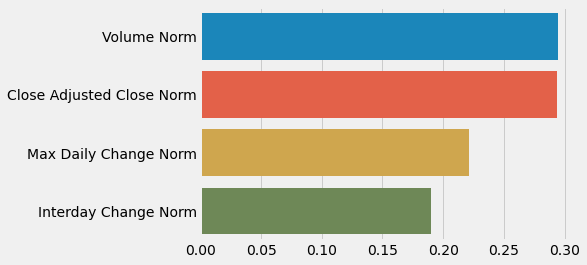

In [41]:
import seaborn as sns
sns.barplot(x=feature_imp
            , y=feature_imp.index
           );

In [42]:
# Drop 'Interday Change Norm' Column
apple_upsampled_reduced = apple_upsampled.drop('Interday Change Norm', axis =1)
apple_upsampled_reduced.head()

,Volume Norm,Max Daily Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Down
0,0.055034,0.461116,0.012671,0
1,0.015661,0.461116,0.023326,1
2,0.016253,0.524380,0.115574,0
3,0.119307,0.467288,0.177599,-1
4,0.091297,0.460459,0.016467,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(apple_upsampled_reduced.drop('Buy Hold Sell Shift1 Down', axis=1)
                                                    , apple_upsampled_reduced['Buy Hold Sell Shift1 Down']
                                                    , test_size = 0.1
                                                    , random_state = 42
                                                   )

In [44]:
# rfcr for Random Forest Classifier Reduced
rfcr = RandomForestClassifier(n_estimators = 100)
rfcr.fit(X_train, y_train)
y_pred = rfcr.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.7784594410361282


In [45]:
cvalr = cross_val_score(rfcr
                       , apple_upsampled_reduced.drop('Buy Hold Sell Shift1 Down', axis=1)
                       , apple_upsampled_reduced['Buy Hold Sell Shift1 Down']
                       , scoring = 'accuracy'
                       , cv = 7
                      )
print(f'7 Fold Cross-Validation Score for Reduced RF Model: {np.mean(cvalr)}')

7 Fold Cross-Validation Score for Reduced RF Model: 0.7943531613875112
